# Applicazione Pratica {#sec-mokken-applications}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [ ]:
# Carica il file _common.R per impostazioni di pacchetti e opzioni
here::here("code", "_common.R") |> source()

# Carica pacchetti aggiuntivi
pacman::p_load(TAM, mirt, mokken)

## Introduzione

In questo capitolo, esamineremo l'applicazione pratica dei concetti e delle metodologie esplorate nel precedente capitolo, affrontando un'analisi dettagliata di un set di dati concreti. Il nostro focus è un caso di studio di grande rilevanza psicologica: l'indagine condotta dai ricercatori dell'ospedale Meyer, mirata a comprendere la capacità di coping delle famiglie di fronte alla diagnosi di una grave malattia in un figlio.

Questo lavoro non solo rappresenta un'opportunità per mettere in pratica le teorie e i metodi discussi, ma offre anche una finestra su questioni di vitale importanza nel campo della psicologia. Affrontare tematiche così delicate ci permette di esplorare le dinamiche familiari in situazioni di stress estremo, fornendo intuizioni preziose che possono guidare interventi psicosociali efficaci.

Per garantire la massima accuratezza e rilevanza dei nostri risultati, iniziamo con un'attenta preparazione e pulizia dei dati. Questo passo ci assicura che l'analisi sia condotta su informazioni ben distribuite e rappresentative, eliminando gli item con eccessiva asimmetria e curtosi.

Attraverso questa esplorazione approfondita, miriamo a dimostrare come le competenze metodologiche e analitiche possano essere efficacemente applicate a questioni di profondo impatto psicologico, evidenziando il potere dell'analisi statistica nel trasformare set di dati complessi in comprensioni approfondite e applicabili.

## Importazione dei dati

In [3]:
df_tot <- readRDS("../../data/fai_2022_11_20.rds")

temp <- df_tot |> 
  dplyr::filter(FLAG == "keep")
temp$FLAG <- NULL

Per migliorare la qualità del nostro set di dati, rimuoveremo gli item che presentano livelli eccessivi di asimmetria (skewness) e curtosi. Questo passaggio è fondamentale per garantire che i nostri dati siano ben distribuiti e rappresentativi, migliorando così l'affidabilità e la validità delle nostre analisi. Gli item con asimmetria e curtosi estreme possono infatti distorcere i risultati degli analisi statistiche e influenzare negativamente le conclusioni tratte dallo studio.

In [4]:
items_stats <- psych::describe(temp)

items_skew_kurt_bad <- items_stats |>
    dplyr::filter(skew > 2.5 | kurtosis > 7.5) |>
    row.names()
print(items_skew_kurt_bad)

 [1] "other"                  "child_birth_place"      "has_chronic_disease"   
 [4] "hospitalization_number" "emergency_care_number"  "divorce"               
 [7] "low_income"             "change_address"         "change_city"           
[10] "is_mother_italian"      "is_father_italian"      "is_father_working"     
[13] "is_child_italian"       "FAI_24"                 "FAI_32"                
[16] "FAI_52"                 "FAI_53"                 "FAI_61"                
[19] "FAI_74"                 "FAI_76"                 "FAI_77"                
[22] "FAI_138"                "FAI_152"                "FAI_174"               
[25] "FAI_175"                "FAI_182"                "FAI_193"               


In [6]:
# Select the strings starting with "FAI_"
bad_fai_items <- grep("^FAI_", items_skew_kurt_bad, value = TRUE)

df <- temp |>
    dplyr::select(!any_of(bad_fai_items))

Ci concentreremo qui su un sottoinsieme di item, ovvero quelli che riguardano l'area delle caratteristiche del bambino.

In [7]:
# First subscale: items names.
item_subscale <- c(
    "FAI_49", "FAI_106", "FAI_60", "FAI_124", "FAI_86",
    "FAI_47", "FAI_121", "FAI_167", "FAI_99",
    "FAI_63", "FAI_168", "FAI_5", "FAI_132", "FAI_85", "FAI_81",
    "FAI_83",
    # "FAI_152",  "FAI_175",
    "FAI_57", "FAI_91", "FAI_135", "FAI_1"
)

# Select only the items of this subscale.
subscale_data <- df %>%
    dplyr::select(all_of(item_subscale))
dim(subscale_data)

[1] 453  20

## Statistiche descrittive

Esaminiamo le statistiche descrittive degli item.

In [8]:
psych::describe(subscale_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAI_49,1,453,0.5629139,1.0320709,0,0.3085399,0.0000,0,4,4,2.0665609,3.6052375,0.04849092
FAI_106,2,453,0.6710817,0.9911011,0,0.4710744,0.0000,0,4,4,1.6036473,2.0835785,0.04656599
FAI_60,3,453,0.9403974,1.2169441,0,0.7272727,0.0000,0,4,4,1.1792903,0.2955897,0.05717702
FAI_124,4,453,1.0463576,1.1955175,1,0.8429752,1.4826,0,4,4,1.1667416,0.4658086,0.05617031
FAI_86,5,453,1.1898455,1.0171900,1,1.0606061,1.4826,0,4,4,0.9491960,0.6428214,0.04779175
FAI_47,6,453,1.6247241,1.1132778,2,1.5950413,1.4826,0,4,4,0.1994007,-0.7340689,0.05230635
FAI_121,7,453,0.4900662,0.7121035,0,0.3746556,0.0000,0,4,4,1.8321794,4.5725145,0.03345754
FAI_167,8,453,1.9072848,1.0306218,2,1.8815427,1.4826,0,4,4,0.1974188,-0.2695266,0.04842284
FAI_99,9,453,2.0618102,1.1543198,2,2.0220386,1.4826,0,4,4,0.3447637,-0.7883135,0.05423468


Esaminiamo la distribuzione del punteggio totale.

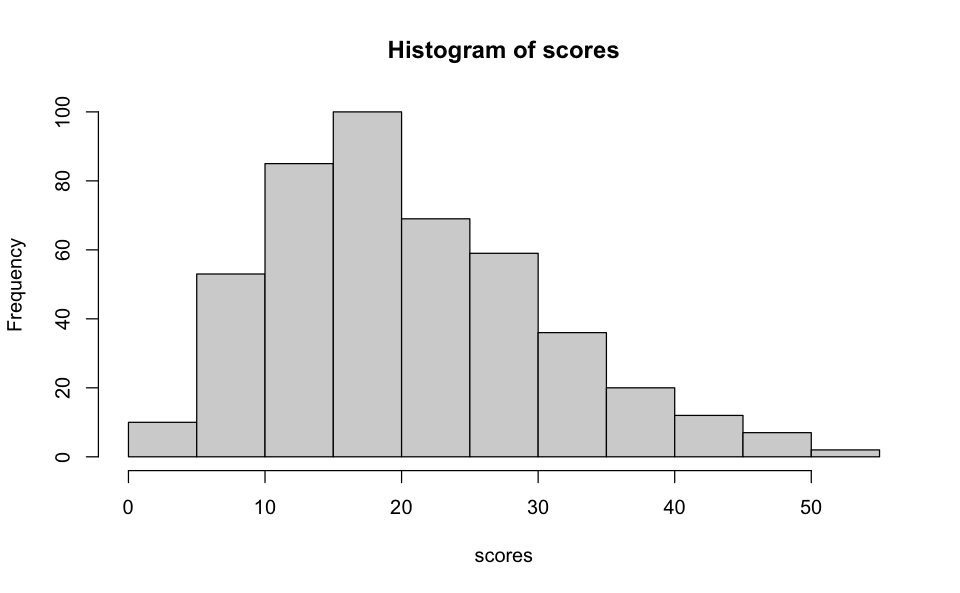

In [9]:
scores <- apply(subscale_data, 1, sum)
hist(scores)

## Automated Item Selection Procedure (AISP)

Il primo passo nell'Analisi delle Scale Mokken (MSA) consiste nell'esecuzione dell'*Automated Item Selection Procedure* (AISP). Come precedentemente discusso, questa analisi ricerca insiemi di item (scale) che si conformano al modello di omogeneità monotona. Similmente all'analisi fattoriale esplorativa, l'AISP è un metodo per suddividere i dati in diverse sottoscale che soddisfano i criteri della MSA, includendo possibilmente anche l'individuazione di eventuali item non scalabili. Per eseguire la AISP, è necessario eseguire il codice seguente.

In [10]:
subscale_data <- as.data.frame(subscale_data)
scale <- aisp(subscale_data, verbose = FALSE)
print(scale)

        0.3
FAI_49    1
FAI_106   1
FAI_60    1
FAI_124   1
FAI_86    0
FAI_47    2
FAI_121   0
FAI_167   0
FAI_99    0
FAI_63    2
FAI_168   0
FAI_5     1
FAI_132   2
FAI_85    2
FAI_81    1
FAI_83    1
FAI_57    2
FAI_91    0
FAI_135   0
FAI_1     0


Nell'output precedente, `FAI_*` sono le etichette degli item considerati. Il valore .30 in alto indica il limite inferiore del coefficiente di scalabilità per la costruzione delle scale. '1' indica che l'item appartiene alla scala 1 e 2 significa che l'item appartiene alla scala 2. '0' indica che l'item non è scalabile. Dei 20 item di questa scala, sette item formano la scala 1 mentre altri cinque item formano la scala 2. Sette item risultano non scalabili. 

È possibile modificare sia il limite inferiore c (il limite inferiore predefinito è .30) sia il livello di alpha, che di default è .05. Per esempio:

In [11]:
scale <- aisp(subscale_data, lowerbound = 0.4, alpha = 0.1)
print(scale)

        0.4
FAI_49    1
FAI_106   1
FAI_60    1
FAI_124   1
FAI_86    0
FAI_47    0
FAI_121   0
FAI_167   0
FAI_99    0
FAI_63    3
FAI_168   0
FAI_5     2
FAI_132   0
FAI_85    0
FAI_81    2
FAI_83    2
FAI_57    3
FAI_91    0
FAI_135   0
FAI_1     0


Si noti che modificare il valore predefinito di c cambia la struttura della scala. Sijtsma e van der Ark (2017) hanno mostrato che il valore predefinito di .30 è quello che si dimostra più utile nella maggior parte delle applicazioni pratiche. Tuttavia, raccomandano di eseguire l'AISP 12 volte con c=0, .05, .10, .15, .20, .25, .30, .35, .40, .45, .50 e .55, così da potere esaminare le seguenti condizioni:

1. Nei dati unidimensionali, all'aumentare di c, si trova successivamente (a) la maggior parte o tutti gli item in una scala; (b) una scala più piccola; e (c) una o poche scale piccole e diversi item non scalabili. Viene raccomandato di prendere il risultato della fase (a) come finale.

2. Nei dati multidimensionali, all'aumentare di c, si trova successivamente (a) la maggior parte o tutti gli item in una scala; (b) due o più scale; e (c) due o più scale più piccole e diversi item non scalabili. Prendere il risultato della fase (b) come finale.

La decisione finale sulla struttura dei dati dovrebbe essere presa dal ricercatore sulla base di considerazioni teoriche e non sono statistiche.

Per eseguire l'AISP con molteplici limiti inferiori, possiamo usare l'istruzione seguente:

In [12]:
aisp(
    subscale_data, 
    lowerbound = c(.05, .10, .15, .20, .25, .30, .35, .40, .45, .50, .55), 
    verbose = FALSE
)

,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55
FAI_49,1,1,1,1,1,1,1,1,1,1,1
FAI_106,1,1,1,1,1,1,1,1,1,1,1
FAI_60,1,1,1,1,1,1,1,1,1,1,1
FAI_124,1,1,1,1,1,1,1,1,1,1,1
FAI_86,1,1,1,0,0,0,0,0,0,0,0
FAI_47,1,1,1,1,2,2,2,0,0,0,0
FAI_121,1,1,1,1,1,0,0,0,0,0,0
FAI_167,1,1,1,2,0,0,0,0,0,0,0
FAI_99,0,0,0,0,0,0,0,0,0,0,0
FAI_63,1,1,1,1,2,2,2,3,3,3,0


Per eseguire un'analisi della dimensionalità utilizzando un metodo diverso, ovvero l'algoritmo genetico (Straat, van der Ark & Sijtsma, 2013), si può utilizzare il seguente codice:

In [13]:
scale <- aisp(subscale_data, search = "ga")
print(scale)

        0.3
FAI_49    1
FAI_106   1
FAI_60    1
FAI_124   1
FAI_86    0
FAI_47    2
FAI_121   0
FAI_167   0
FAI_99    0
FAI_63    2
FAI_168   0
FAI_5     1
FAI_132   2
FAI_85    2
FAI_81    1
FAI_83    1
FAI_57    2
FAI_91    0
FAI_135   0
FAI_1     0


I risultati dell'algoritmo genetico sono equivalenti a quelli ottenuti utilizzando il limite inferiore raccomandato di 0.3.

I risultati dell'analisi della dimensionalità ottenuti tramite l'AISP e l'algoritmo genetico (GA) dovrebbero essere replicabili in altri campioni. Pertanto, nelle procedure AISP e GA, la dimensione del campione è un fattore critico. Sijtsma e Molenaar (2002) affermano che l'AISP richiede almeno 100 partecipanti. Tuttavia, in studi basati su simulazioni di Monte Carlo, Straat, van der Ark e Sijtsma (2014) hanno dimostrato che sia l'AISP sia il GA necessitano di un campione compreso tra 250 e 500 partecipanti quando la qualità degli item (ovvero la loro capacità discriminante) è elevata, e tra 1250 e 1750 partecipanti quando la qualità degli item è scarsa.

Possiamo selezionare gli item della scala 1 individuata dalla AISP nel modo seguente.

In [14]:
aisp.lb <- aisp(subscale_data, lowerbound = .3)
good_items <- subscale_data[, aisp.lb == 1]
names(good_items) |> print()

[1] "FAI_49"  "FAI_106" "FAI_60"  "FAI_124" "FAI_5"   "FAI_81"  "FAI_83" 


## Scalability Coefficients

Il codice seguente ritorna i valori $H_{ij}$, $H_j$, e $H$. Nelle parentesi tonde sono riportati gli errori standard.

In [15]:
scal_coef <- coefH(good_items, se = TRUE)
scal_coef |> print()

$Hij
        FAI_49  se      FAI_106 se      FAI_60  se      FAI_124 se      FAI_5  
FAI_49                   0.561  (0.057)  0.608  (0.054)  0.601  (0.048)  0.212 
FAI_106  0.561  (0.057)                  0.617  (0.042)  0.722  (0.039)  0.317 
FAI_60   0.608  (0.054)  0.617  (0.042)                  0.688  (0.037)  0.280 
FAI_124  0.601  (0.048)  0.722  (0.039)  0.688  (0.037)                  0.288 
FAI_5    0.212  (0.056)  0.317  (0.055)  0.280  (0.052)  0.288  (0.052)        
FAI_81   0.254  (0.060)  0.354  (0.056)  0.324  (0.050)  0.381  (0.053)  0.413 
FAI_83   0.223  (0.057)  0.381  (0.056)  0.430  (0.047)  0.387  (0.048)  0.409 
        se      FAI_81  se      FAI_83  se     
FAI_49  (0.056)  0.254  (0.060)  0.223  (0.057)
FAI_106 (0.055)  0.354  (0.056)  0.381  (0.056)
FAI_60  (0.052)  0.324  (0.050)  0.430  (0.047)
FAI_124 (0.052)  0.381  (0.053)  0.387  (0.048)
FAI_5            0.413  (0.049)  0.409  (0.048)
FAI_81  (0.049)                  0.551  (0.041)
FAI_83  (0.048)  0.

Possiamo interpretare i coefficienti di scalabilità nel modo seguente.

1. **Coefficiente di Scalabilità tra Coppie di Item (Hij):** 
   Per ogni coppia di item (i, j), il coefficiente $H_{ij}$ valuta l'efficacia con cui questi due item riflettono la variabile latente. Un coefficiente $H_{ij}$ positivo per coppie di item appartenenti alla stessa scala di Mokken indica che questi item sono coerenti e misurano efficacemente la stessa variabile latente. Matematicamente, $H_{ij}$ è definito per ogni coppia di item i e j, dove i, j = 1, ..., J.

2. **Coeffiente di Scalabilità dell'Item (Hj):** 
   Il coefficiente $H_{j}$ di un singolo item è analogo ai parametri di discriminazione nei modelli IRT parametrici. Esprime l'efficacia con cui un item distingue tra individui a diversi livelli della variabile latente. Per essere considerato efficace, $H_{j}$ dovrebbe superare un certo limite inferiore, generalmente stabilito a c > 0.3.

3. **Coefficiente di Scalabilità del Test (H):** 
   H rappresenta la scalabilità complessiva dell'intero insieme di item. L'interpretazione di H segue le seguenti soglie euristiche:
    - **Debole:** se 0.3 ≤ H < 0.4.
    - **Moderato:** se 0.4 ≤ H < 0.5.
    - **Forte:** se H > 0.5.
   
   Questi valori indicano la forza con cui l'insieme di item misura la variabile latente. I coefficienti di scalabilità degli item forniscono indicazioni sulla discriminazione degli item e sulla loro aderenza al modello di omogeneità monotona. Item con bassa discriminazione non contribuiscono a un ordinamento affidabile degli esaminandi e dovrebbero essere scartati.

Secondo Sijtsma e Molenaar (2002), le assunzioni di unidimensionalità, indipendenza locale e monotonicità implicano le seguenti restrizioni sui coefficienti di scalabilità:
- 0 ≤ $H_{ij}$ ≤ 1, per tutte le coppie di item i ≠ j.
- 0 ≤ $H_{j}$ ≤ 1, per tutti gli item j.
- 0 ≤ $H$ ≤ 1, per l'intero insieme di item.

I coefficienti di scalabilità sono fondamentali per valutare quanto efficacemente un insieme di item lavori insieme per misurare una variabile latente. Valori alti di $H$ suggeriscono che l'insieme di item è fortemente correlato e misura in modo affidabile la variabile latente, garantendo che l'analisi con la MSA sia valida e affidabile.

È possibile ottenere il numero di valori negativi $H_{ij}$ per ciascun item usando il codice seguente.

In [16]:
scal_coef <- coefH(good_items, se = FALSE)$Hij
apply(scal_coef, 1, function(x) sum(x < 0)) |> print()

$Hij
           FAI_49   FAI_106    FAI_60   FAI_124     FAI_5    FAI_81    FAI_83
FAI_49  1.0000000 0.5613569 0.6075009 0.6005396 0.2118286 0.2539023 0.2229846
FAI_106 0.5613569 1.0000000 0.6172766 0.7223965 0.3168352 0.3539449 0.3812326
FAI_60  0.6075009 0.6172766 1.0000000 0.6879216 0.2795178 0.3243635 0.4303254
FAI_124 0.6005396 0.7223965 0.6879216 1.0000000 0.2879511 0.3813744 0.3866023
FAI_5   0.2118286 0.3168352 0.2795178 0.2879511 1.0000000 0.4132827 0.4085199
FAI_81  0.2539023 0.3539449 0.3243635 0.3813744 0.4132827 1.0000000 0.5506000
FAI_83  0.2229846 0.3812326 0.4303254 0.3866023 0.4085199 0.5506000 1.0000000

$Hi
   FAI_49   FAI_106    FAI_60   FAI_124     FAI_5    FAI_81    FAI_83 
0.4096841 0.4929127 0.4838063 0.5019022 0.3231299 0.3862103 0.4040312 

$H
[1] 0.4279251

 FAI_49 FAI_106  FAI_60 FAI_124   FAI_5  FAI_81  FAI_83 
      0       0       0       0       0       0       0 


L'istruzione seguente esegue la procedura frequentista del test di ipotesi, con l'ipotesi alternativa che i coefficienti di scalabilità sono maggiori di zero. Il test è unidirezionale, dunque il valore soglia della statistica $z$ è 1.65.

In [17]:
coefZ(good_items) |> print()

$Zij
           FAI_49   FAI_106    FAI_60   FAI_124    FAI_5    FAI_81    FAI_83
FAI_49   0.000000 11.122254 11.766708 11.519386 4.077595  4.303706  4.213676
FAI_106 11.122254  0.000000 12.328013 14.049032 6.189922  6.313023  7.368202
FAI_60  11.766708 12.328013  0.000000 14.039308 5.741312  6.231554  8.542324
FAI_124 11.519386 14.049032 14.039308  0.000000 5.889676  7.265907  7.779304
FAI_5    4.077595  6.189922  5.741312  5.889676 0.000000  8.141997  8.214378
FAI_81   4.303706  6.313023  6.231554  7.265907 8.141997  0.000000 10.794877
FAI_83   4.213676  7.368202  8.542324  7.779304 8.214378 10.794877  0.000000

$Zi
  FAI_49  FAI_106   FAI_60  FAI_124    FAI_5   FAI_81   FAI_83 
18.87934 23.25525 23.49005 24.24297 15.73678 17.72590 19.40083 

$Z
[1] 37.97973



Nel caso presente, il test indica che i coefficienti di scalabilità di tutti gli item, sia considerati singolarmente sia considerati a coppie, sono maggiori di zero. Lo stesso si può dire per il coefficiente di scalabilità della scala nel suo complesso.

## Monotonicità

Come spiegato in precedenza, la monotonicità è un'importante assunzione della MSA. La probabilità di una risposta corretta dovrebbe aumentare con θ. La monotonicità può essere esaminata con il seguente codice:

In [18]:
monoton <- check.monotonicity(good_items)
summary(monoton) |> print()

        ItemH #ac #vi #vi/#ac maxvi sum sum/#ac zmax #zsig crit
FAI_49   0.41  20   0       0     0   0       0    0     0    0
FAI_106  0.49  12   0       0     0   0       0    0     0    0
FAI_60   0.48  18   0       0     0   0       0    0     0    0
FAI_124  0.50  21   0       0     0   0       0    0     0    0
FAI_5    0.32  24   0       0     0   0       0    0     0    0
FAI_81   0.39  24   0       0     0   0       0    0     0    0
FAI_83   0.40  21   0       0     0   0       0    0     0    0


Ogni riga dell'output rappresenta un item (ad esempio, FAI_49, FAI_106, ecc.). La spiegazione delle colonne è la seguente:

1. **ItemH**: Il coefficiente H per ogni item, che misura l'omogeneità dell'item. Un valore più alto indica una maggiore omogeneità. Nelle scale di Mokken, si cercano generalmente valori superiori a 0.3.

2. **#ac (Active pairs)**: Il numero di coppie attive, ovvero coppie di risposte che contribuiscono alla stima dell'H.

3. **#vi (Violations)**: Il numero di violazioni della monotonicità. La monotonicità implica che, man mano che aumenta il punteggio totale del test, la probabilità di una risposta positiva all'item non diminuisce.

4. **#vi/#ac**: Il rapporto tra il numero di violazioni e il numero di coppie attive.

5. **maxvi (Maximum violation)**: La massima violazione osservata.

6. **sum (Sum of violation size)**: La somma delle dimensioni delle violazioni.

7. **sum/#ac**: Il rapporto tra la somma delle dimensioni delle violazioni e il numero di coppie attive.

8. **zmax**: Il valore massimo della statistica Z per le violazioni.

9. **#zsig (Number of significant Z)**: Numero di statistiche Z significative.

10. **crit**: Un criterio per giudicare se le violazioni sono problematiche.

Nel caso presente, sembra che non ci siano violazioni della monotonicità per nessuno degli item elencati. Questo significa che per questi item, all'aumentare del punteggio totale, non si osserva una diminuzione della probabilità di una risposta positiva, mantenendo quindi una buona coerenza interna e validità per la scala.

Un grafico della monotonicità per una coppia di item si ottiene nel modo seguente.

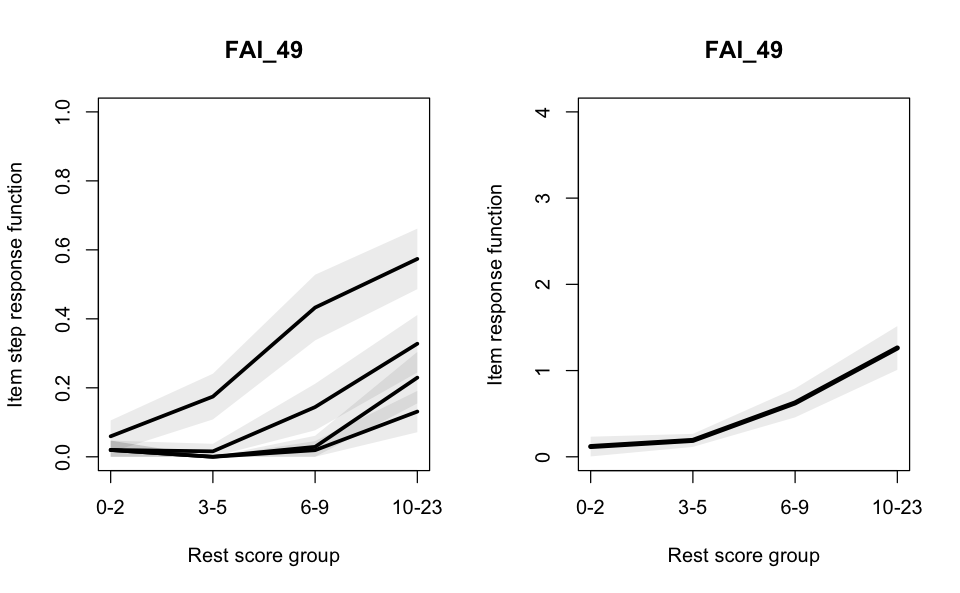

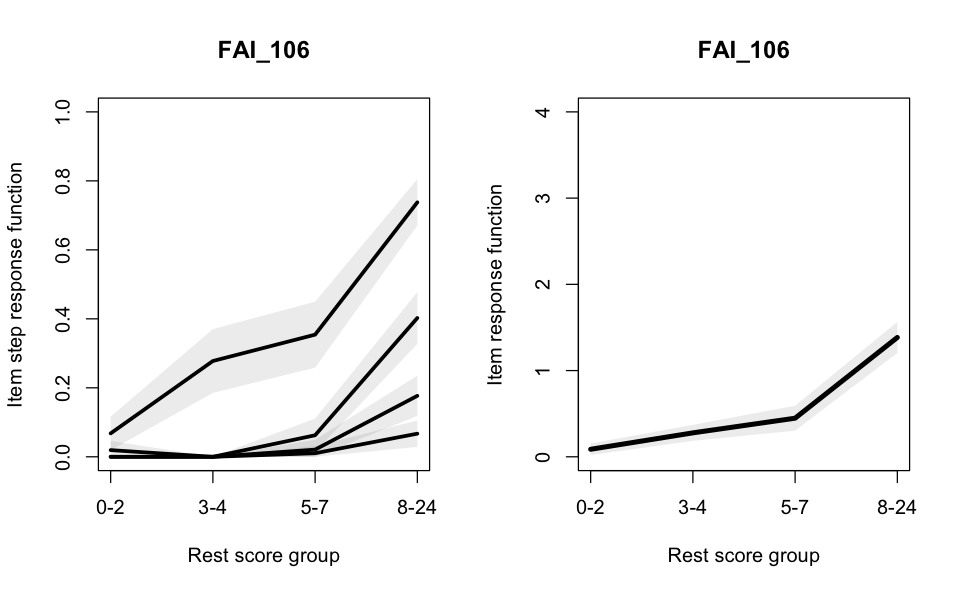

In [19]:
plot(check.monotonicity(good_items), item = c(1, 2))

La figura di questo esempio illustra i grafici di monotonicità per gli Item 49 e 106. Il grafico è diviso in due pannelli. Il pannello sul lato sinistro mostra le Funzioni di Risposta del Passaggio dell'Item (ISRFs), mentre il pannello sul lato destro mostra la Funzione di Risposta all'Item (IRF) complessiva per ciascun item. Il grafico evidenzia che sia l'IRF sia le ISRFs sono sempre non decrescenti per l'item 49; per l'item 106, invece, si osserva una piccola violazione della monotonicità.

Se esaminiamo tutti gli item dell'area relativa alle caratteristiche del bambino (non solo quelli selezionati dalla procedura AISP) notiamo come, per alcuni item, si osserva un numero di violazioni maggiore di zero.

In [20]:
monoton2 <- check.monotonicity(subscale_data)
summary(monoton2) |> print()

        ItemH #ac #vi #vi/#ac maxvi  sum sum/#ac zmax #zsig crit
FAI_49   0.25  24   0    0.00  0.00 0.00  0.0000 0.00     0    0
FAI_106  0.30  15   0    0.00  0.00 0.00  0.0000 0.00     0    0
FAI_60   0.30  18   0    0.00  0.00 0.00  0.0000 0.00     0    0
FAI_124  0.32  24   0    0.00  0.00 0.00  0.0000 0.00     0    0
FAI_86   0.16  21   0    0.00  0.00 0.00  0.0000 0.00     0    0
FAI_47   0.23  24   0    0.00  0.00 0.00  0.0000 0.00     0    0
FAI_121  0.18  23   0    0.00  0.00 0.00  0.0000 0.00     0    0
FAI_167  0.18  24   2    0.08  0.04 0.07  0.0031 1.07     0   31
FAI_99   0.12  24   1    0.04  0.05 0.05  0.0023 1.58     0   31
FAI_63   0.23  24   0    0.00  0.00 0.00  0.0000 0.00     0    0
FAI_168  0.23  18   1    0.06  0.06 0.06  0.0032 0.73     0   25
FAI_5    0.23  24   0    0.00  0.00 0.00  0.0000 0.00     0    0
FAI_132  0.21  24   0    0.00  0.00 0.00  0.0000 0.00     0    0
FAI_85   0.17  19   1    0.05  0.07 0.07  0.0035 1.08     0   30
FAI_81   0.24  24   1    

## Ordinamento Invariante degli Item 

Il passo successivo nella MSA è indagare l'ordinamento invariante degli item (IIO) o la non intersezione delle Funzioni di Risposta all'Item (IRFs). È fondamentale determinare se l'ordine degli item sia lo stesso per tutti i rispondenti con diversi livelli del tratto. Esistono diversi metodi per esaminare l'IIO. Il metodo predefinito nel pacchetto R `mokken` è l'IIO manifesto o MIIO (Manifest IIO) (Ligtvoet, Van der Ark, Te Marvelde & Sijtsma, 2010). Per esaminare l'ordinamento invariante degli item, eseguiamo il seguente codice.

In [21]:
iio <- check.iio(good_items)
summary(iio) |> print()

$method
[1] "MIIO"

$item.summary
        ItemH #ac #vi #vi/#ac maxvi  sum sum/#ac tmax #tsig crit
FAI_81   0.39  18   0    0.00  0.00 0.00  0.0000 0.00     0    0
FAI_83   0.40  18   0    0.00  0.00 0.00  0.0000 0.00     0    0
FAI_124  0.50  18   1    0.06  0.31 0.31  0.0171 3.50     1   83
FAI_5    0.32  18   2    0.11  0.42 0.73  0.0407 3.50     2  145
FAI_60   0.48  18   1    0.06  0.42 0.42  0.0236 2.49     1   97
FAI_106  0.49  18   0    0.00  0.00 0.00  0.0000 0.00     0    0
FAI_49   0.41  18   0    0.00  0.00 0.00  0.0000 0.00     0    0

$backward.selection
        step 1 step 2
FAI_81       0      0
FAI_83       0      0
FAI_124      1      0
FAI_5        2     NA
FAI_60       1      0
FAI_106      0      0
FAI_49       0      0

$HT
[1] 0.3358101



L'output include due tabelle principali. La prima tabella contiene le seguenti colonne. La prima colonna, "ItemH", mostra il coefficiente di scalabilità Hi per ciascun item, '#ac' indica il numero totale di coppie attive, '#vi' segnala il numero totale di violazioni, '#vi/#ac' mostra il numero medio di violazioni per coppia attiva, 'maxvi' indica la massima violazione, 'sum' rappresenta la somma di tutte le violazioni, 'sum/#ac' mostra la media delle violazioni per coppia attiva, 'tmax' indica la statistica di test massima, '#tsig' il numero di violazioni significative, e il valore 'crit' è una somma ponderata di altri elementi come 'itemH', '#ac', ecc. Valori elevati di 'crit' indicano item di scarsa qualità (il valore 0 è perfetto, valori più alti sono peggiori).

L'output precedente mostra che l'Item FAI_5 ha 2 violazioni. In altre parole, la IRF per questo item si interseca con la IRF di altri due item, ed entrambe queste violazioni sono significative (#tsig per questo item è 2). Poiché ha il numero più alto di violazioni, è un buon candidato per essere rimosso dal test. Rimuovere questo item risolve l'intersezione degli altri item con questo item.

Per esaminare graficamente queste intersezione, usiamo il codice seguente.

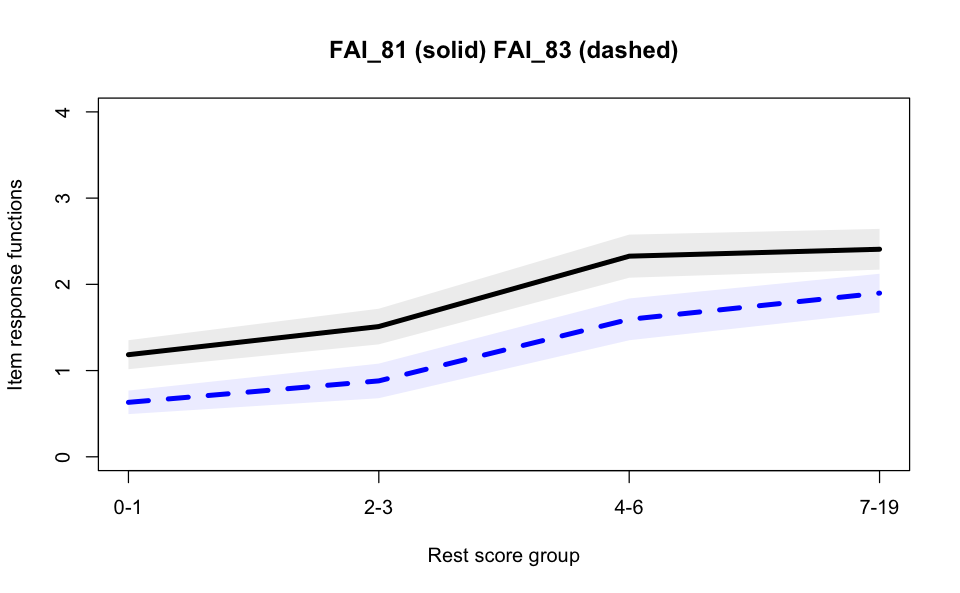

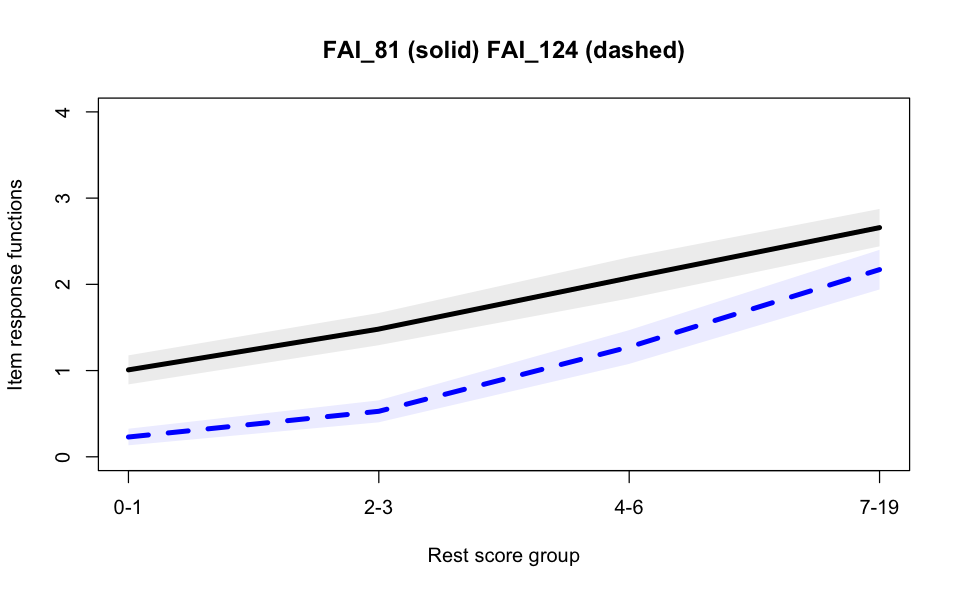

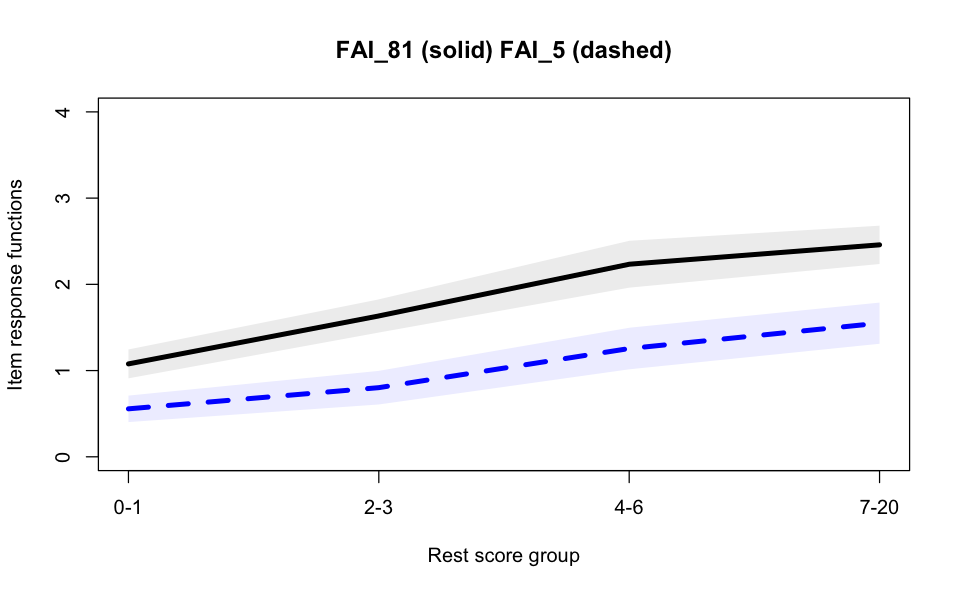

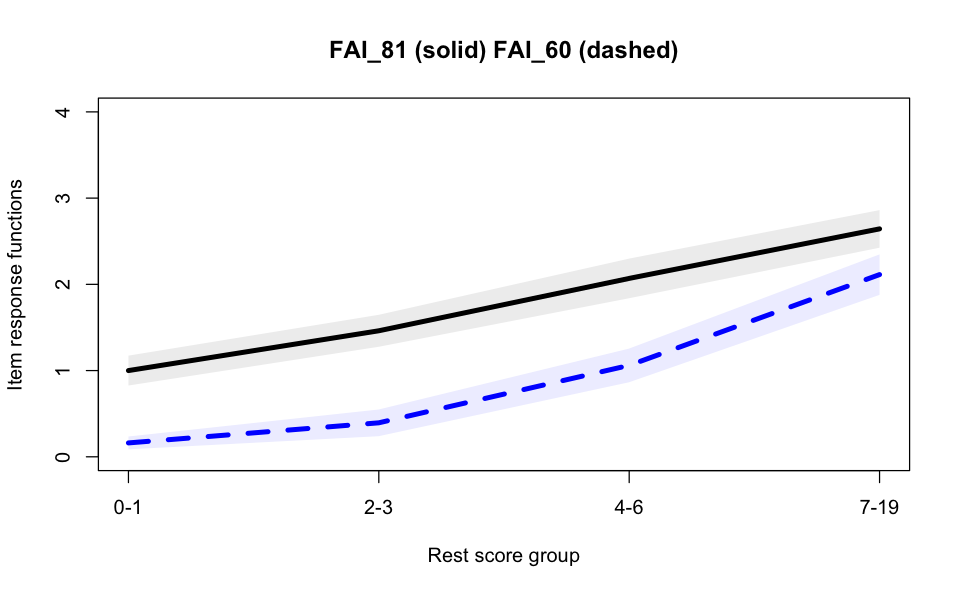

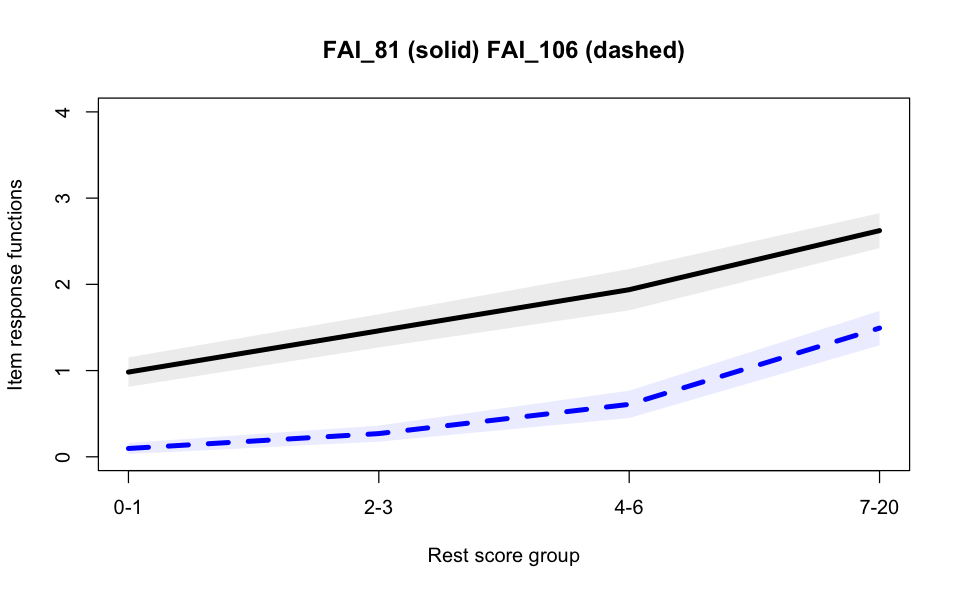

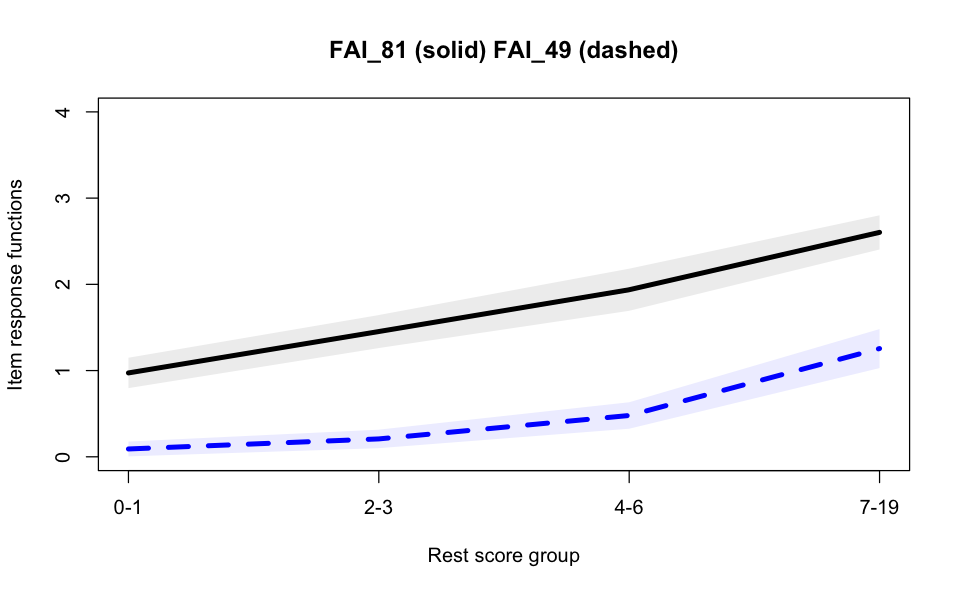

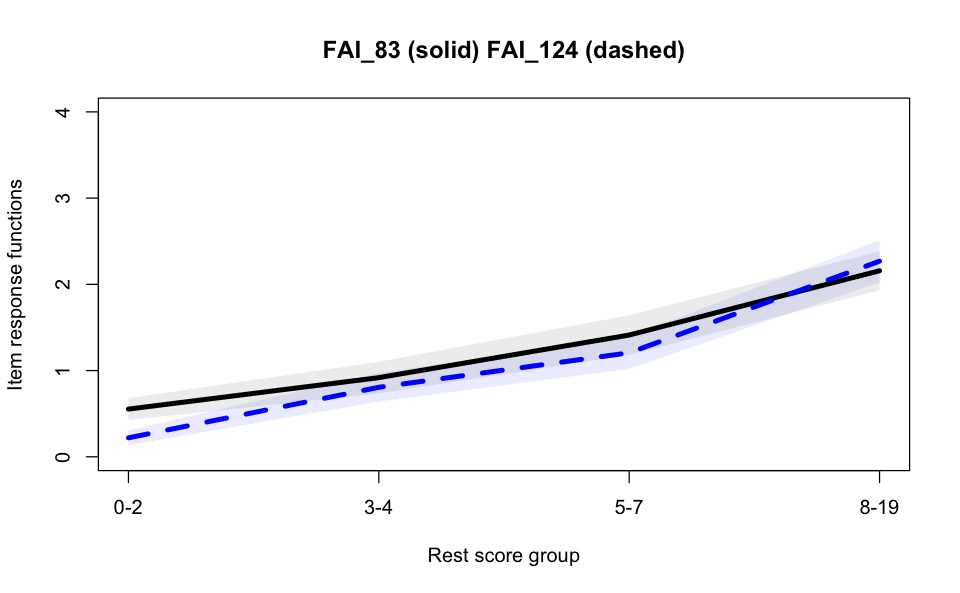

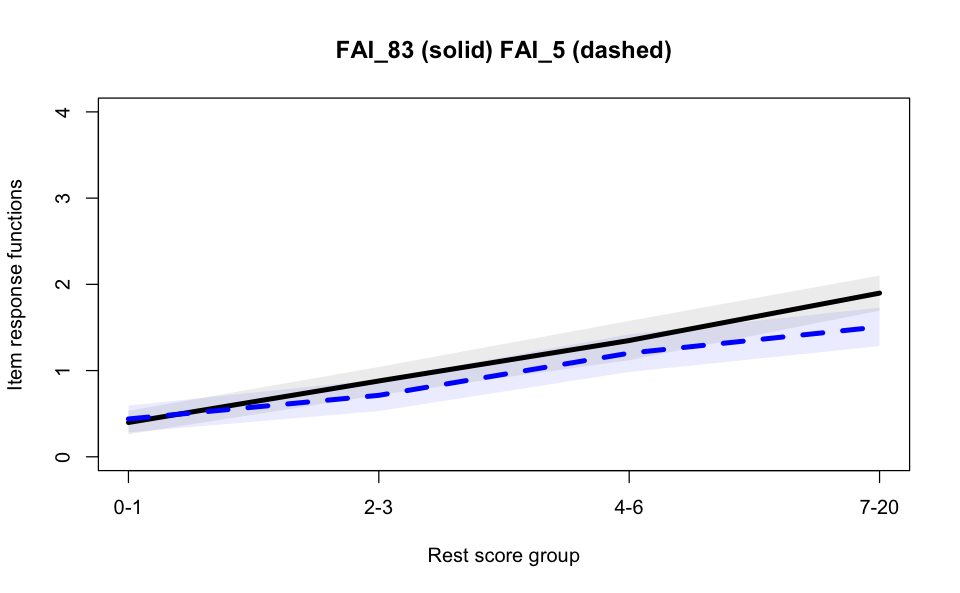

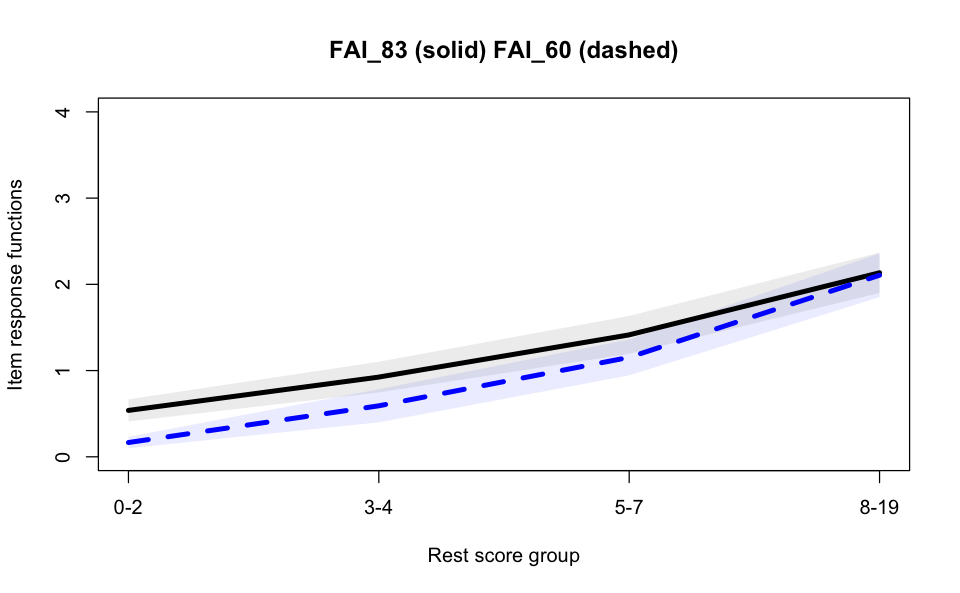

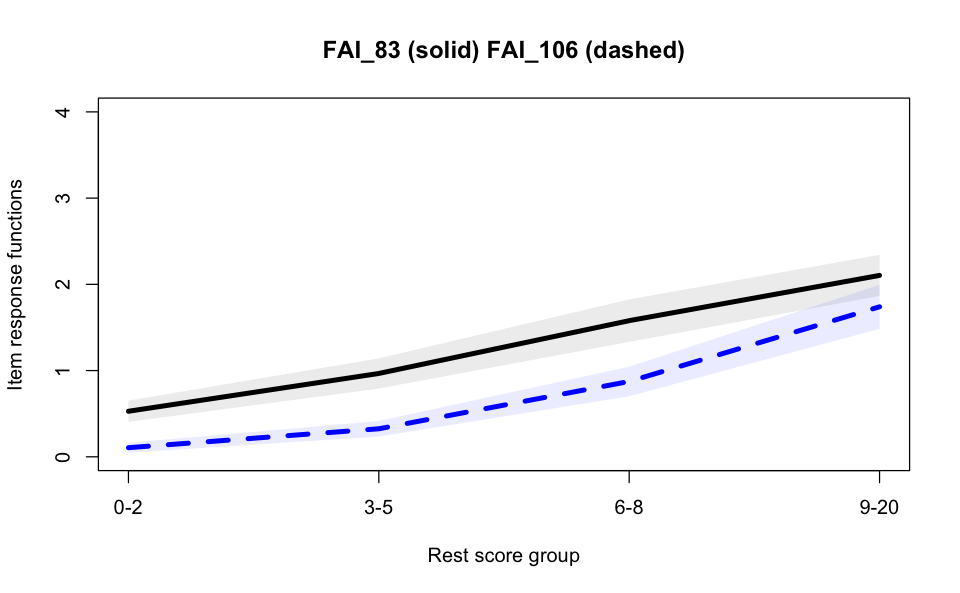

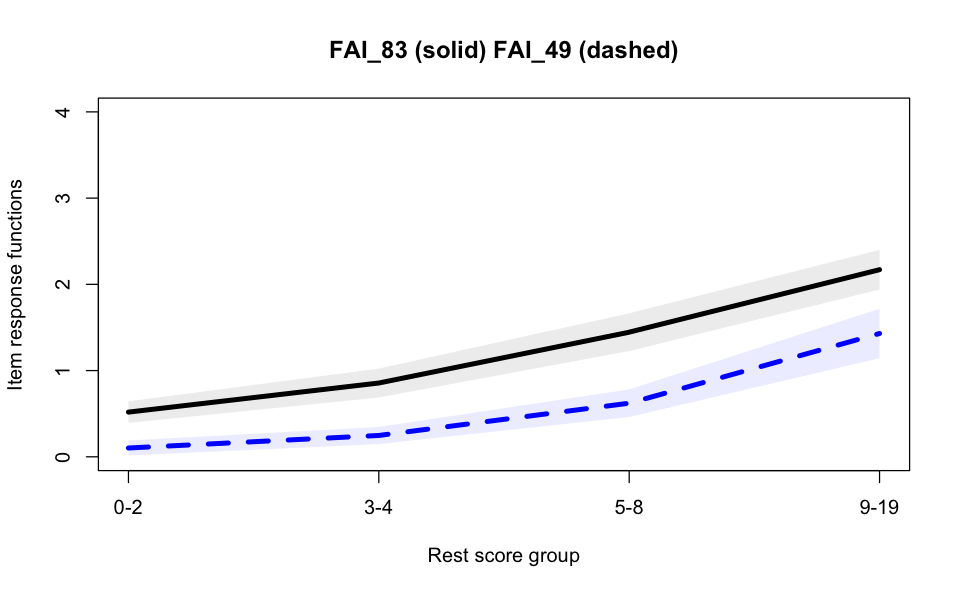

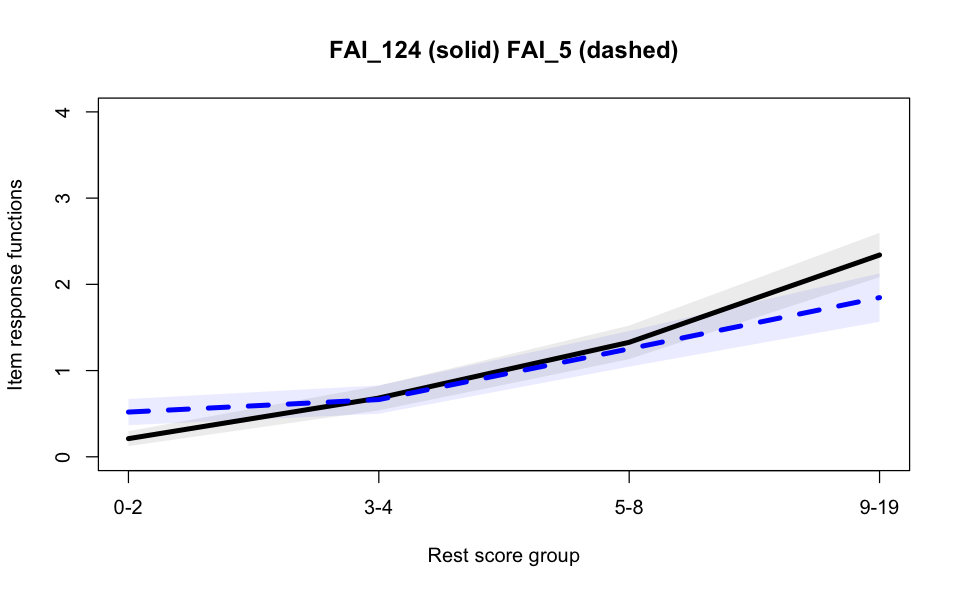

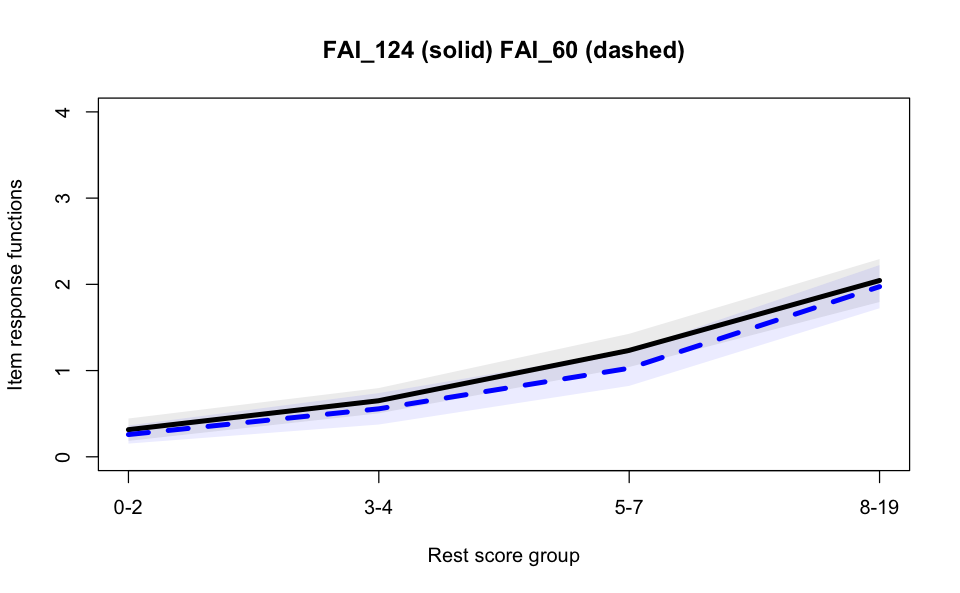

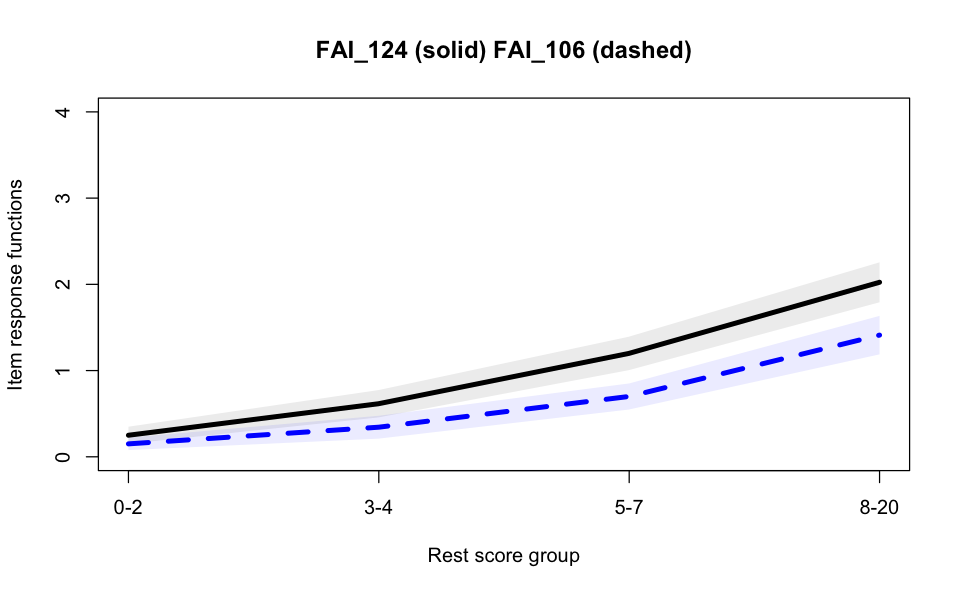

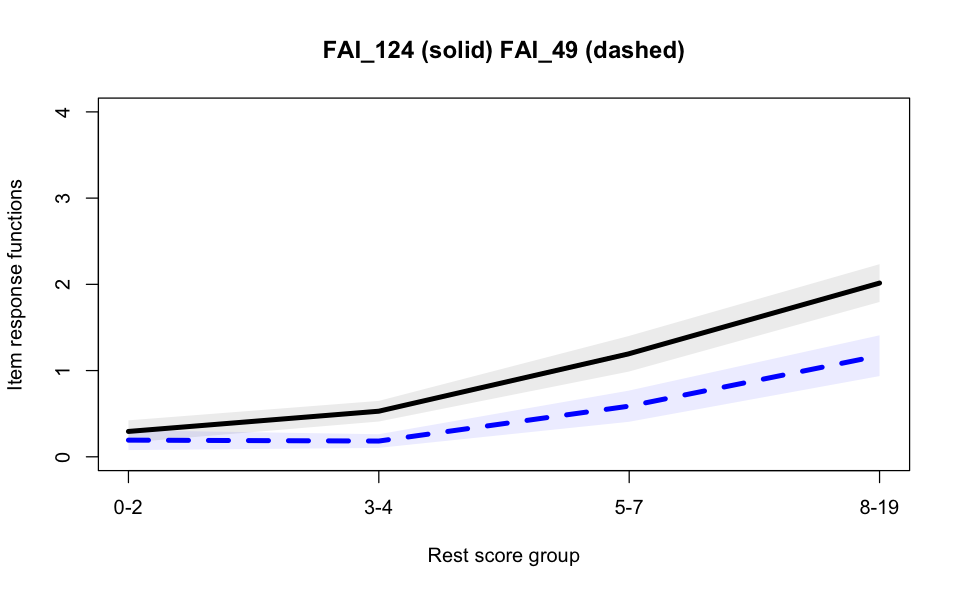

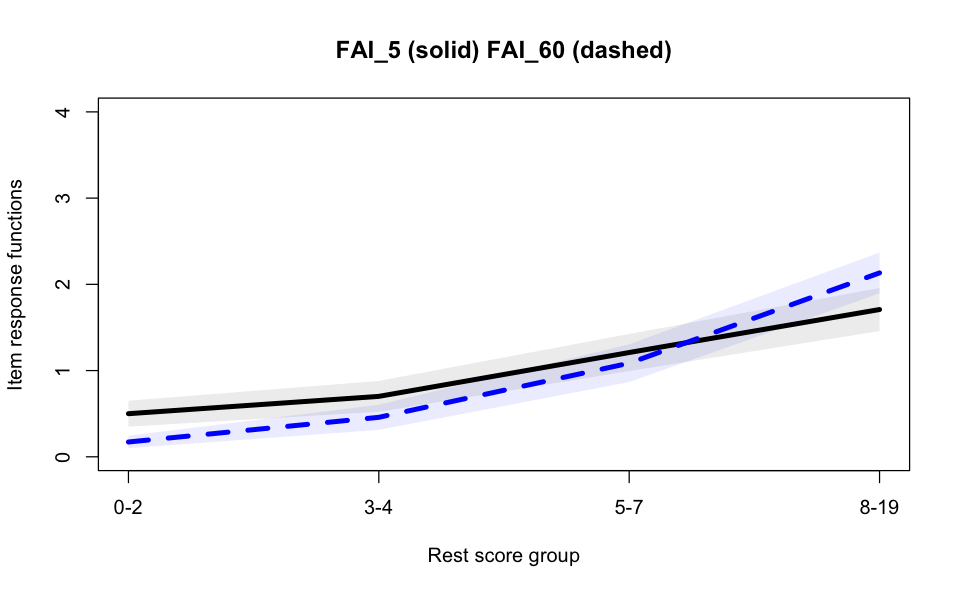

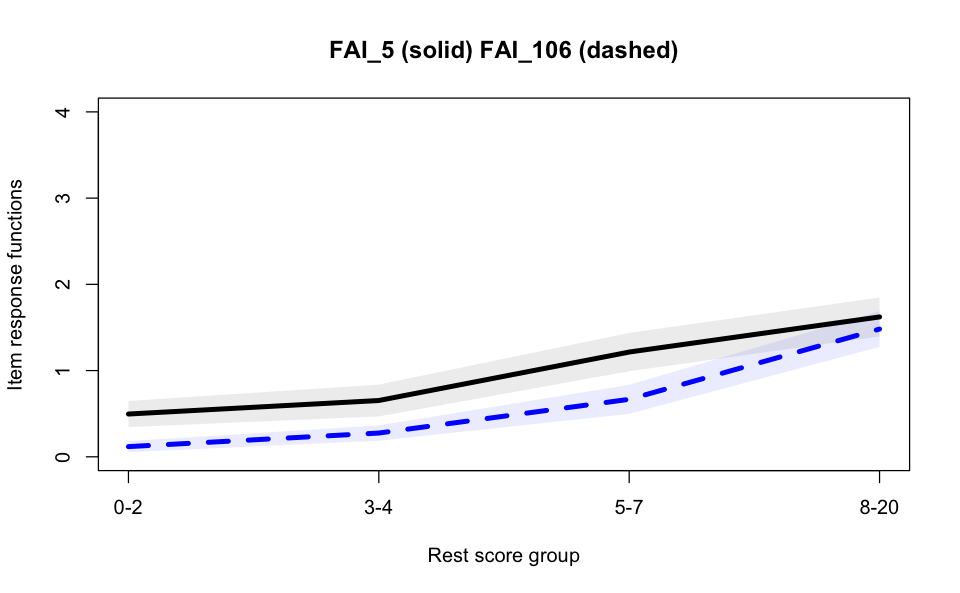

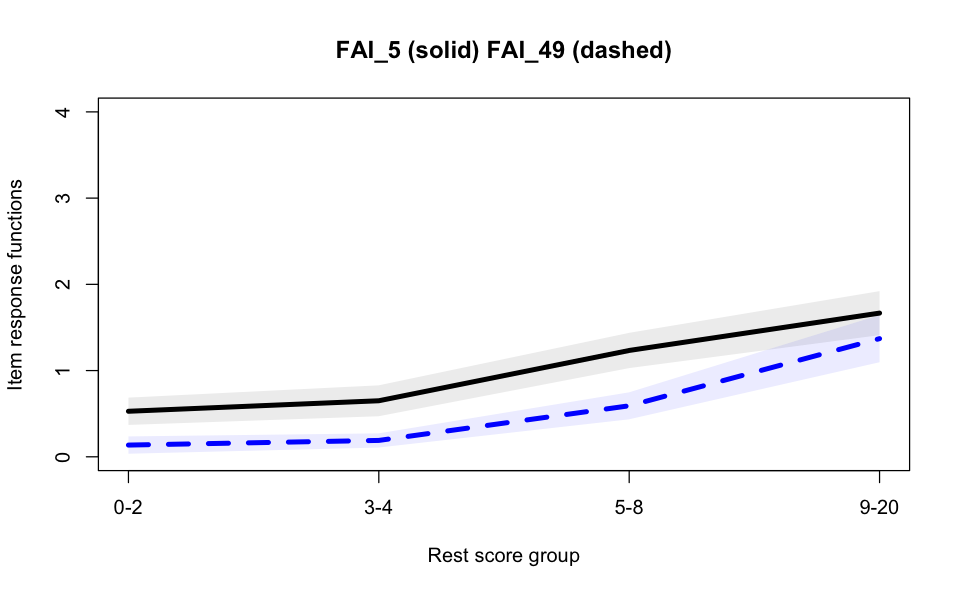

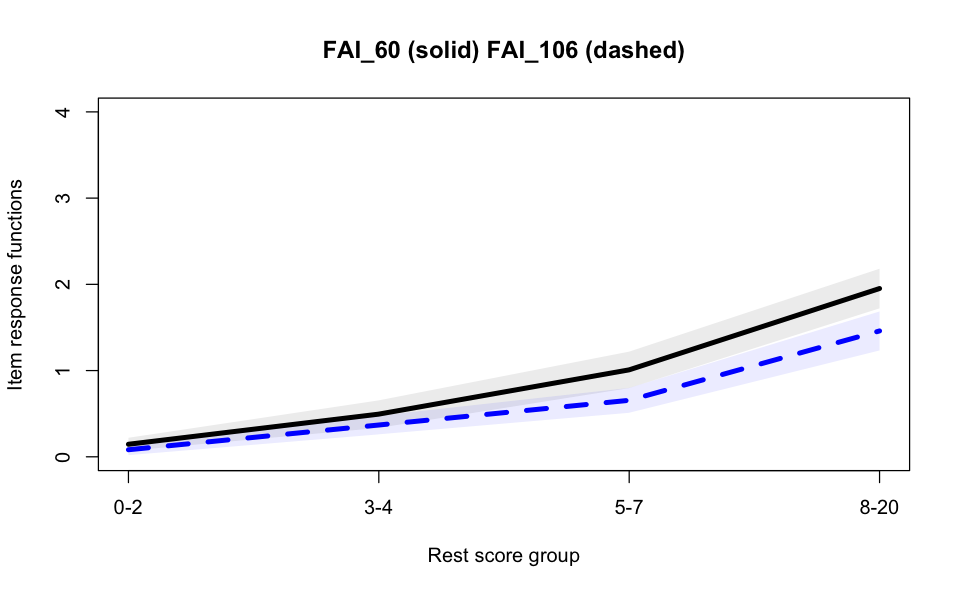

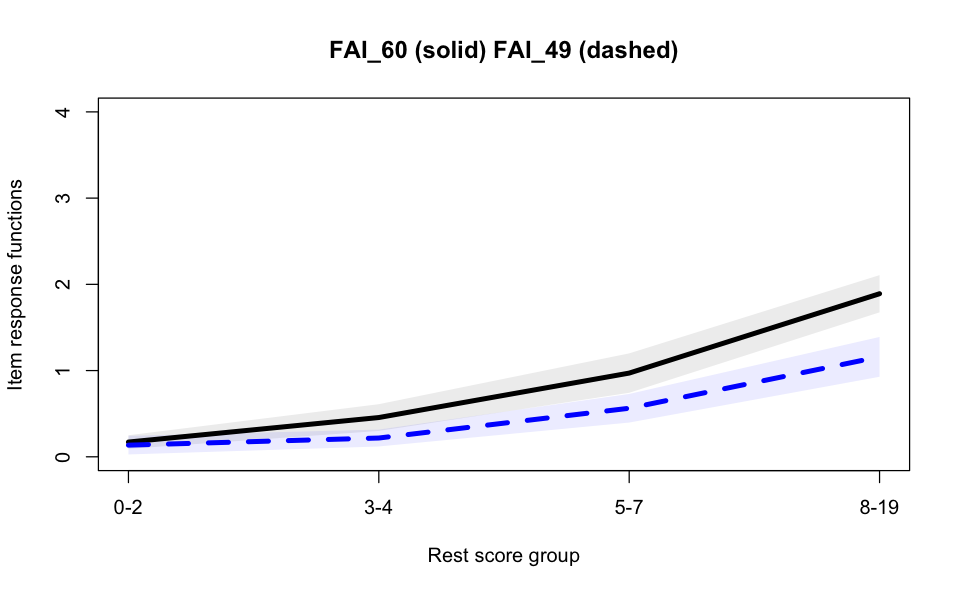

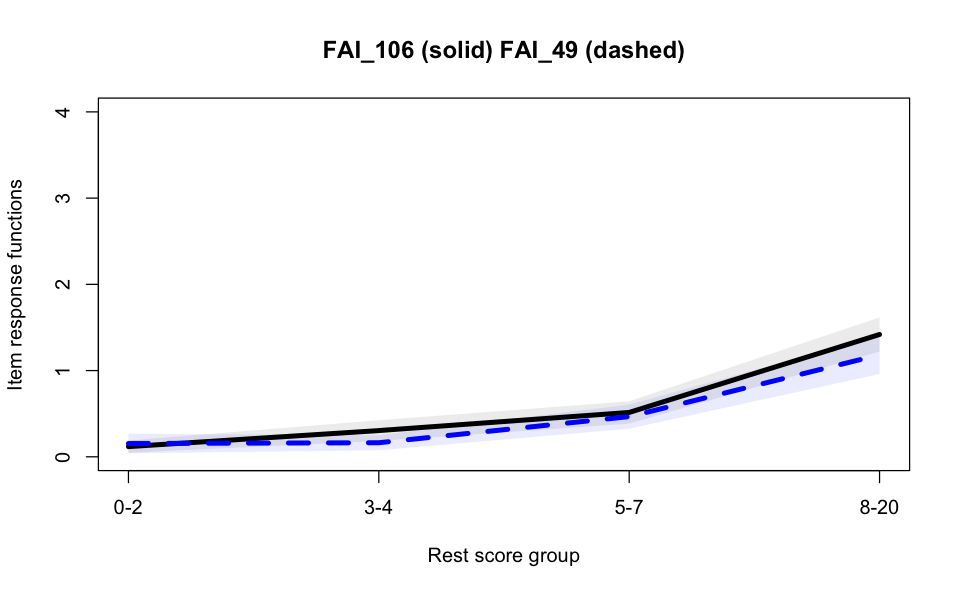

In [22]:
plot(iio)

## Non intersezione delle funzioni di risposta degli step degli item

Per indagare sulla non intersezione delle funzioni di risposta degli step degli item si possono impiegare le matrici P++ e P-- (Molenaar & Sijtsma, 2000).

In [23]:
pmatrix <- check.pmatrix(good_items)
summary(pmatrix) |> print()

        ItemH  #ac #vi #vi/#ac maxvi  sum sum/#ac zmax #zsig crit
FAI_49   0.41 1920  17    0.01  0.05 0.65   3e-04 2.93    15   67
FAI_106  0.49 1920  10    0.01  0.06 0.39   2e-04 4.21    10   59
FAI_60   0.48 1920  23    0.01  0.06 0.94   5e-04 3.88    22   81
FAI_124  0.50 1920  20    0.01  0.06 0.84   4e-04 4.60    20   80
FAI_5    0.32 1920  25    0.01  0.06 1.07   6e-04 3.88    24   92
FAI_81   0.39 1920  28    0.01  0.05 1.09   6e-04 3.60    27   89
FAI_83   0.40 1920  17    0.01  0.06 0.68   4e-04 4.60    16   78


Come spiegato nelle sezioni precedenti, la colonna '#vi' indica il numero di violazioni delle ISRF. La colonna ‘#zsig’ mostra il numero di violazioni statisticamente significative. Le violazioni possono anche essere controllate graficamente utilizzando il seguente codice:

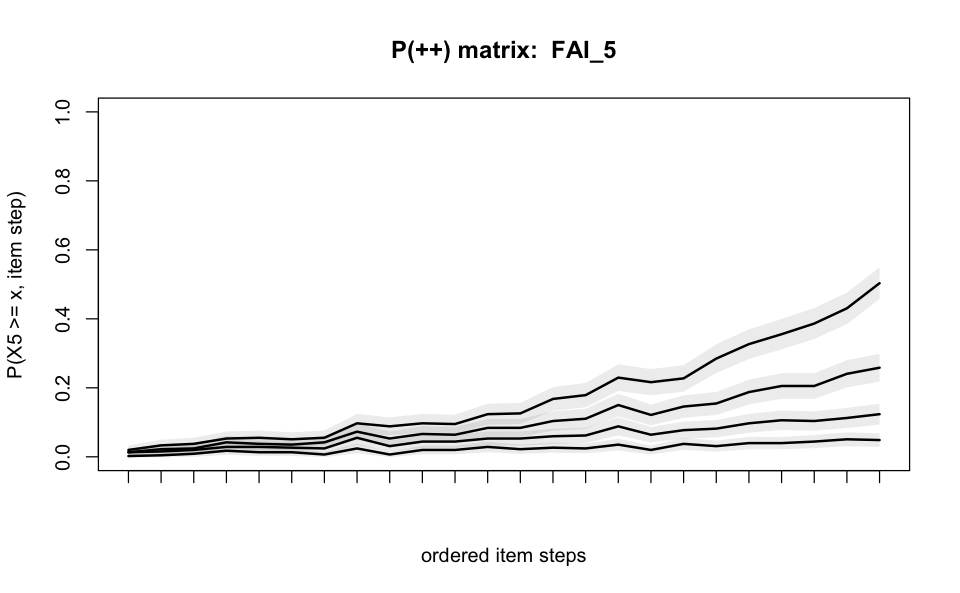

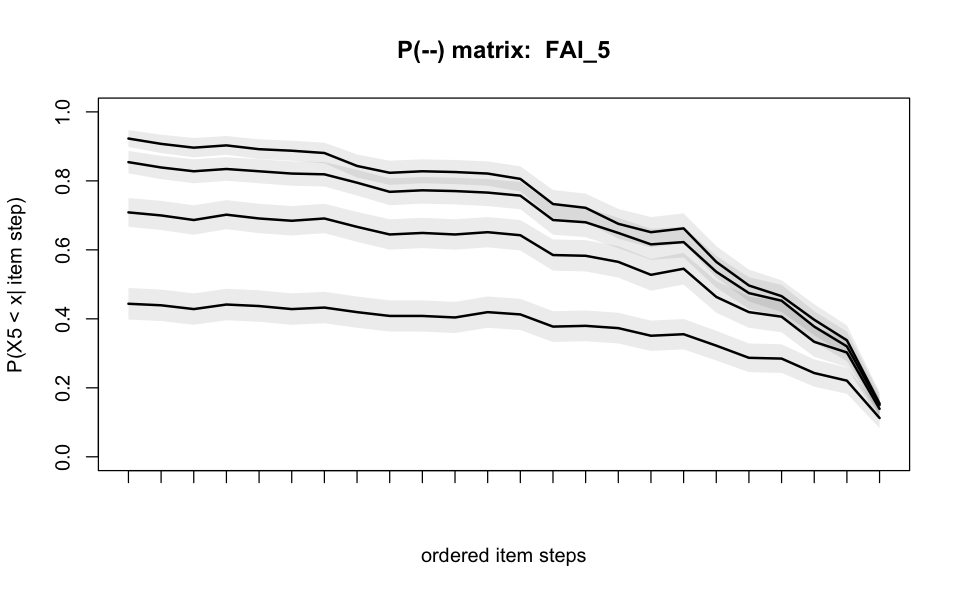

In [24]:
plot(check.pmatrix(good_items), item = 5)

La non intersezione delle ISRF può essere esaminata anche con il metodo del punteggio residuo.

In [25]:
restscore <- check.restscore(good_items) 
summary(restscore) |> print()

        ItemH #ac #vi #vi/#ac maxvi  sum sum/#ac zmax #zsig crit
FAI_49   0.41 288   5    0.02  0.08 0.23  0.0008 1.19     0   18
FAI_106  0.49 288   7    0.02  0.07 0.33  0.0011 2.16     2   34
FAI_60   0.48 288   6    0.02  0.14 0.47  0.0016 2.19     4   50
FAI_124  0.50 288   9    0.03  0.15 0.56  0.0019 2.78     1   44
FAI_5    0.32 288  14    0.05  0.15 1.01  0.0035 2.78     5   74
FAI_81   0.39 288   8    0.03  0.10 0.44  0.0015 1.70     1   37
FAI_83   0.40 288   9    0.03  0.07 0.40  0.0014 2.07     1   36


I risultati del metodo del punteggio residuo sono diversi da quelli delle matrici P++ e P--. L'output viene interpretato come abbiamo fatto in precedenza. La colonna ‘#vi’ indica il numero di violazioni delle ISRF. La colonna ‘#zsig’ mostra il numero di violazioni statisticamente significative. Questa colonna mostra che il numero di violazioni statisticamente significative è molto inferiore rispetto a quelle riportate dalle matrici P++ e P--. La violazione della non intersezione può essere esaminata graficamente nel modo seguente. Per esempio, consideriamo gli item FAI_49 e FAI_5.

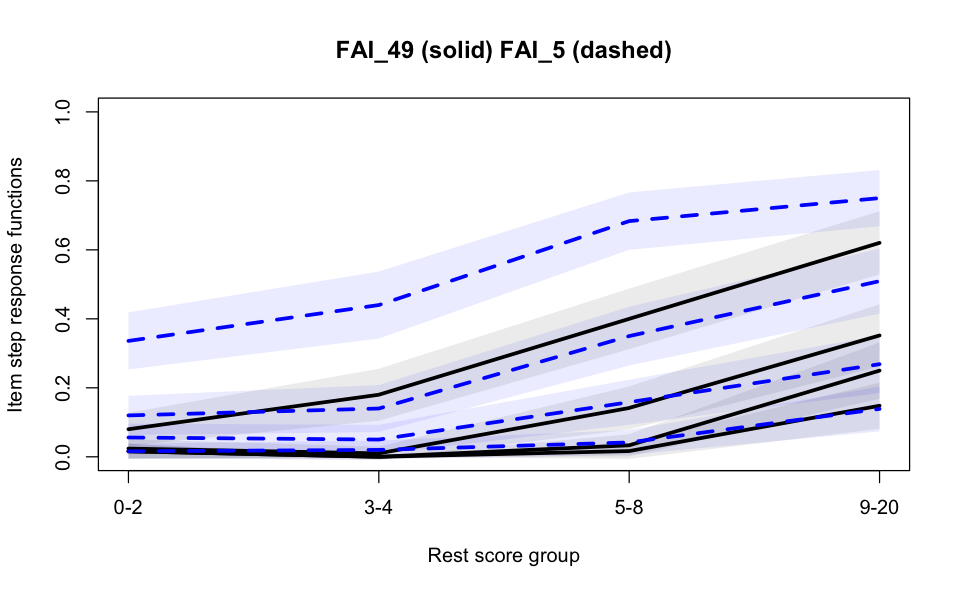

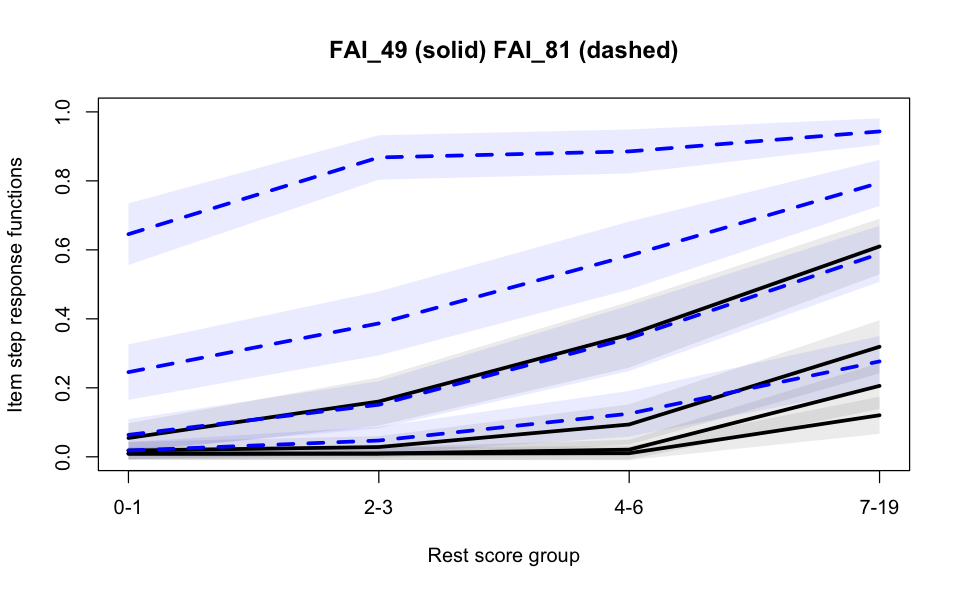

In [26]:
plot(restscore, item.pairs = c(4, 5))

## Affidabilità

Il pacchetto Mokken calcola quattro diversi coefficienti di affidabilità: l'affidabilità della scala Mokken (MS) ρ, (Mokken, 1971), Lambda-2 (Guttman, 1945), l'alpha di Cronbach (Cronbach, 1951), e il coefficiente di affidabilità della classe latente (LCRC, van der Ark, van der Palm, & Sijtsma, 2011). 

1. **MS (Molenaar-Sijtsma Method)**: Questo indice è basato sul metodo Molenaar-Sijtsma di stima dell'affidabilità per scale non parametriche, come quelle analizzate con l'analisi Mokken. Questo metodo considera la varianza tra gli item e la varianza totale per stimare l'affidabilità. 

2. **Alpha (Cronbach's Alpha)**: L'alpha di Cronbach è forse il più noto indice di affidabilità, utilizzato per valutare la consistenza interna degli item di un test. Misura fino a che punto gli item di un test sono correlati tra loro. 

3. **Lambda-2**: Un altro indice di affidabilità, simile all'alpha di Cronbach, ma talvolta considerato più robusto poiché tiene conto delle correlazioni medie tra gli item. 

4. **LCRC (Latent Class Reliability Coefficient)**: Questo è un indice di affidabilità che tiene conto dell'approccio delle classi latenti. È particolarmente utile quando gli item possono essere raggruppati in sottoscale che riflettono diversi costrutti o dimensioni. 

Per ottenere queste stime dell'affidabilità è possibile eseguire il seguente codice.

In [27]:
check.reliability(good_items, LCRC = TRUE)

$MS
[1] 0.8191105

$alpha
[1] 0.8167507

$lambda.2
[1] 0.8241484

$LCRC
[1] 0.8435599

In generale, tutti i valori ottenuti indicano che la scala in considerazione ha un'alta affidabilità. Questo significa che è probabile che produca risultati coerenti nel tempo e che gli item che la compongono siano correlati tra loro in modo significativo, contribuendo tutti a misurare lo stesso costrutto o costrutti correlati.

## Identificazione degli Outlier

Gli outlier sono persone con modelli di risposta aberranti o molti errori di Guttman. Sijtsma e van der Ark (2017) raccomandano di rimuovere gli outlier e di rieseguire l'analisi senza di essi. Se c'è una differenza notevole nei risultati, allora la rimozione degli outlier è giustificata. Per ottenere il numero di errori di Guttman per ogni rispondente eseguiamo il seguente codice:

In [28]:
gutt <- check.errors(good_items)
print(gutt)

$Gplus
  [1]  2  6  0  7  2  4 23 30  2  7 15  0  1  9  2  0  5 24  3  3  0  0 11 51  0
 [26]  4  2 19  9  2 60  2  9 35  2 17 39  2  4  3  3 12  3  0 10  2  0  0 37  4
 [51] 68  0  2 31  2  0 12 36  1 70 12  1 28 27 25  3  4 10  9 16 28 22 81 26  1
 [76]  0 65 28  0 25  3 59 60 40  0  5  0  0  1  0  8  3  8  6 27 12 22 16 12  4
[101] 12  9  0  0 20 25 25  6  4  6  0 47 20 18  4  7  6 33 14 25 12  4  0  1 65
[126] 17 83 26 65  5  5 30  2  9 42  7 13  8 16  3 41  0 12 21  4  8 26 22  3 46
[151]  7 14 38 12 12  1  6  4 32 11  2  6 17  1  8  8 27  8  3  5 58  2 62  3  0
[176] 12 10 45 21  0  2 10 31 19 46 11 21  2 25  9 17  2  4 20 21 49 18 19 14 16
[201] 44  5  7 14 41 24 44  0 18  9 31 12  9 46  8  6 11 14 23 41 24  1  7 39 23
[226]  0 23  3  6  2  2  4  0  0  8 24 38  0 16 62  2  2 21  7 25  9  0  0  8 14
[251] 10  4  1  0  2 18  0 21 19  0 12  0 41  8  7 16 25 20  3 41  3  0  6 18  0
[276]  4  2  4  4 12  5 13  6  9  7  6  0  6  7  2  0  0 13 26  8 41 30  2  0  6
[301]  6  0  5  2  0 

Il vettore `$Gplus` mostra il numero di errori di Guttman G+ per ogni persona. I valori 54.5 e 354.5259 sono le Tukey fences per il rilevamento degli outlier. Essi segnalano i casi in cui il numero di errori di Guttman G+ è oltre il Tukey fence della distribuzione di G+. 

Il primo valore, 54.5, è il limite per il numero di errori di Guttman se la distribuzione è approssimativamente normale. I rispondenti con un numero di errori di Guttman superiore al limite possono essere considerati sospetti. Il valore 354.5259 è un limite di soglia per il numero di errori di Guttman se la distribuzione è asimmetrica. 

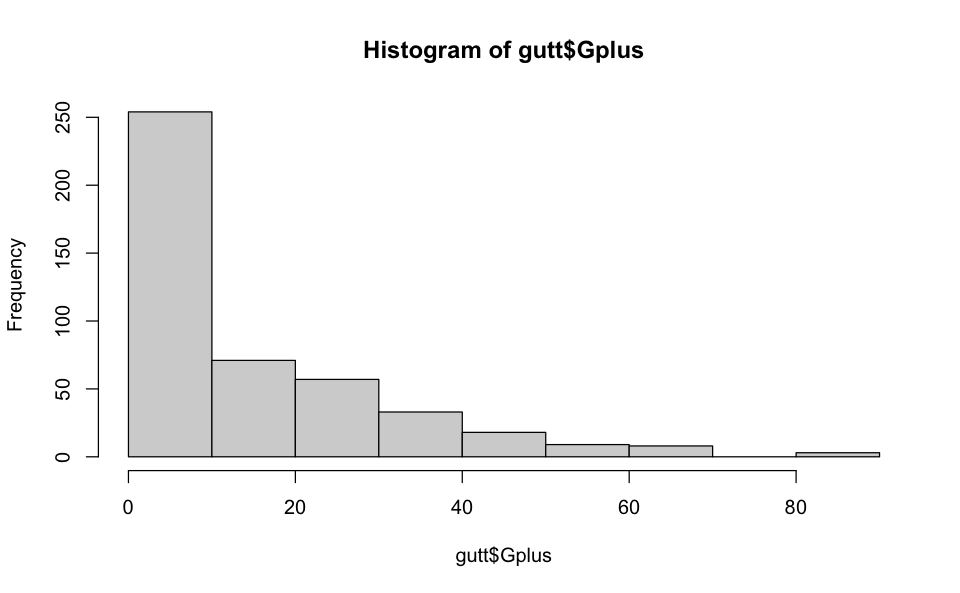

In [29]:
hist(gutt$Gplus)

Per il caso presente, l'istogramma del numero di errori di Gutmann mostra che la loro distribuzione è asimmetrica positiva. Pertanto, possiamo scegliere il secondo limite soglia. Per trovare le persone con valori G+ sopra il Tucky fence superiore, eseguiamo il seguente codice.

In [30]:
err <- gutt$Gplus 
which(err > 354.5259)

integer(0)

I risultati indicano che, in base a questo secondo criterio, non ci sono modelli di risposta sospetti nei dati.

Se questa procedura producesse invece come risultato l'individuazione di alcuni outlier, potremmo rimuoverli dai dati nel modo seguente:

`good_items_clean <- good_items[-which(err > 354.5259), ]`

## Considerazioni conclusive

In questo capitolo, abbiamo esplorato un approccio pratico all'analisi di un set di dati reali, utilizzando il caso di studio sull'indagine della capacità di coping delle famiglie di fronte alla diagnosi di una grave malattia in un figlio, condotta dai ricercatori del Meyer. Attraverso una serie di passaggi metodici e analitici rigorosi, siamo riusciti a trasformare un complesso insieme di dati in informazioni comprensibili e significative.

Abbiamo iniziato importando i dati e conducendo un'accurata pulizia per rimuovere gli item con eccessiva asimmetria e curtosi. Successivamente, abbiamo implementato la Procedura di Selezione Automatica degli Item (AISP) nell'ambito dell'Analisi delle Scale Mokken (MSA) per identificare e selezionare scale omogenee e coerenti.

Una volta stabilite le scale, abbiamo approfondito le caratteristiche degli item, esaminando le loro statistiche descrittive e la loro distribuzione. Abbiamo anche valutato la loro affidabilità attraverso vari coefficienti, tra cui l'Alpha di Cronbach e il Coefficiente di Affidabilità della Classe Latente (LCRC), rilevando un'alta coerenza interna. 

Ulteriori analisi hanno incluso la verifica della monotonicità degli item e dell'ordinamento invariante degli item (IIO), fondamentali per garantire che la scala rispettasse i principi teorici sottostanti la MSA. Infine, abbiamo esaminato la presenza di outlier, utilizzando i Tukey fences per identificare e gestire i modelli di risposta aberranti.

In conclusione, questo capitolo dimostra come l'applicazione metodica e sistematica delle tecniche di analisi statistica possa fornire intuizioni preziose e comprensibili da un set di dati complesso. Ciò non solo rafforza la validità e l'affidabilità della ricerca, ma fornisce anche una base solida per ulteriori indagini e interpretazioni.

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [31]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS 15.0

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] mokken_3.1.2         poLCA_1.6.0.1        MASS_7.3-61         
 [4] scatterplot3d_0.3-44 mirt_1.42            lattice_0.22-6      
 [7] TAM_4.2-21           CDM_8.2-6            mvtnorm_1.3-1       
[10] ggokabeito_0.1.0     viridis_0.6.5        viridisLite_0.4.2   
[13] ggpubr_0.6.0         ggExtra_0.10.1       bayesplot_1.11.1    
[16] gridExtra_2.3        patchwork_1.3.0      semTools_0.5-6      
[19] semPlot_1.1.6        lavaan_0.6-18        psych_2.4.6.26      
[22